# Исследование для развлекательного приложения Procrastinate Pro+

## Введение

В данном исследовании будет рассматриваться развлекательное приложение *Procrastinate Pro+*. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

В качестве исходных данных представлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, а именно:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Необходимо изучить:**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Исследование будет проводиться в несколько этапов:**

1. Загрузка данных и их подготовка к анализу
2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
4. Изучение показателей маркетинга
5. Оценка окупаемости рекламы
6. Общий вывод и рекомендации

### Загрузка данных и их подготовка к анализу

#### Загрузка данных

In [6]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

In [7]:
# чтение файлов и их запись в датафреймы

visits = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/visits_info_short.csv')
orders = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/orders_info_short.csv')
costs_info = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/costs_info_short.csv')

#### Изучение общей информации о данных

In [9]:
# функция для изучения датафреймов

def research(data):
    display(data.head(10))                            # вывод первых строк датафрейма
    display(data.info())                              # вывод общей информации о датафрейме
    print('\033[1m Количество полных дублей: \033[0m', 
            data.duplicated().sum())                  # проверка на полные дубликаты
    display(data.describe())                          # описание распределения численных значений
    
    for x in data.columns:
        display(data[x].value_counts().to_frame())    # распределение значений в каждом столбце

Выведем первые 10 строк с каждого загруженного датафрейма и общую информацию о каждом из них. Начнём с датафрейма посещений сайта:

In [11]:
research(visits)

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

 Количество полных дублей:  0


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

count
User Id            
33606575057      46
943775408561     36
901180916748     35
870784569391     34
764086596354     33
...             ...
214203066007      1
369265191867      1
346271445800      1
133742530598      1
279181973476      1

[150008 rows x 1 columns]

count
Region               
United States  207327
UK              36419
France          35396
Germany         30759

count
Device         
iPhone   112603
Android   72590
PC        62686
Mac       62022

count
Channel                   
organic             107760
TipTop               54794
FaceBoom             49022
WahooNetBanner       20465
LeapBob              17013
OppleCreativeMedia   16794
RocketSuperAds       12724
YRabbit               9053
MediaTornado          8878
AdNonSense            6891
lambdaMediaAds        6507

count
Session Start             
2019-06-27 14:56:41      3
2019-10-15 09:47:57      3
2019-08-25 08:20:51      3
2019-10-10 22:50:07      3
2019-10-22 17:17:39      3
...                    ...
2019-08-10 14:18:14      1
2019-08-10 05:32:58      1
2019-08-10 02:14:48      1
2019-08-10 12:40:46      1
2019-10-31 14:17:43      1

[306813 rows x 1 columns]

count
Session End               
2019-07-16 02:23:30      3
2019-07-29 11:21:53      3
2019-08-03 06:31:26      3
2019-08-20 15:27:15      3
2019-09-23 20:37:13      3
...                    ...
2019-08-10 14:15:39      1
2019-08-11 00:05:05      1
2019-08-10 23:01:52      1
2019-08-10 04:21:45      1
2019-10-31 15:17:04      1

[306793 rows x 1 columns]

Датафрейм `visits` не содержит пропусков и дубликатов в данных.
Необходимо привести все названия колонок датафрейма к нижнему регистру и добавить подчеркивания между словами, а также привести данные о дате и времени начала и окончания сессии в верный тип данных - `datetime`. Столбцы `Region`, `Device` и `Channel` имеют небольшое количество уникальных значений, поэтому их тип данных можно изменить на категориальный для экономии памяти. Такая предобработка данных будет выполнена в следующем пункте исследования.

Далее изучим датафрейм с заказами:

In [13]:
research(orders)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

 Количество полных дублей:  0


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

count
User Id            
901180916748     22
883098437811     20
75337957494      19
512471511263     19
295795879965     19
...             ...
829252887757      1
499471996783      1
847348136580      1
390188868722      1
168548862926      1

[8881 rows x 1 columns]

count
Event Dt                  
2019-10-26 06:49:22      2
2019-06-27 06:09:53      2
2019-09-14 23:35:11      2
2019-10-05 08:23:22      2
2019-10-11 20:55:22      2
...                    ...
2019-08-20 02:51:09      1
2019-08-20 06:58:44      1
2019-08-20 14:41:23      1
2019-08-20 18:09:32      1
2019-10-31 13:29:06      1

[40163 rows x 1 columns]

count
Revenue       
4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204

Датафрейм `orders` так же не содержит пропусков и дубликатов. Здесь тоже необходимо привести все названия колонок датафрейма к нижнему регистру и добавить подчеркивания между словами, а также изменить тип данных в столбце, содержащем дату и время покупки на `datetime`.

И последний датафрейм `costs_info` с информацией о расходах на рекламу:

In [15]:
research(costs_info)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

 Количество полных дублей:  0


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

count
dt               
2019-05-01     10
2019-08-22     10
2019-08-24     10
2019-08-25     10
2019-08-26     10
...           ...
2019-07-01     10
2019-07-02     10
2019-07-03     10
2019-07-04     10
2019-10-27     10

[180 rows x 1 columns]

count
Channel                  
FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180

count
costs        
6.40       26
3.36       21
9.60       20
16.80      19
11.55      17
...       ...
203.30      1
184.30      1
186.20      1
172.90      1
2.40        1

[608 rows x 1 columns]

Пропусков и дубликатов нет. Следует изменить регистр в названии столбца `Channel`, а также тип данных в столбце `dt` на `date` и столбец `Channel` на категориальный тип данных.

#### Предобработка данных

##### Приведение столбцов к корректному стилю оформления

In [19]:
# функция для приведения названий столбцов к нижнему регистру и замены пробелов на подчеркивания + проверка

def change_column(data):
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    return display(data.columns)

In [20]:
# вызов функции для каждого датафрейма

change_column(visits)
change_column(orders)
change_column(costs_info)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Преобразование выполнено успешно.

##### Преобразование типов данных

In [23]:
# преобразуем тип данных в datetime и date:

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date

Также для сокращения использования памяти заменим тип данных в столбцах `region` и `device` и `channel` на категориальный:

In [25]:
visits = visits.astype({'region': 'category', 'device': 'category', 'channel': 'category'})
costs_info['channel'] = costs_info['channel'].astype('category')

Проверка:

In [27]:
visits.dtypes

user_id                   int64
region                 category
device                 category
channel                category
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [28]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [29]:
costs_info.dtypes

dt           object
channel    category
costs       float64
dtype: object

**Вывод**

- данные, которые предстоит исследовать, записаны в 3 датафрейма: `visits` - данные о посещениях сайта, `orders` - данные о заказах и `costs_info` - информация о расходах на рекламу;
- изменены типы данных в столбцах, содержащих (дату) дату и время на (`date`) `datetime`, в столбцах с небольшим количеством уникальных значений изменен тип данных на `category` для экономии памяти;
- в названиях столбцов для корректного оформления исправлен регистр на нижний;
- пропусков и дубликатов в данных не выявлено.

### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

##### Функция для создания профилей пользователей

In [34]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M').dt.to_timestamp()

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для расчёта удержания

In [36]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для расчёта конверсии

In [38]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчёта LTV и ROI

In [40]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков

##### Функция для сглаживания данных

In [43]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для визуализации удержания

In [45]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для визуализации конверсии

In [47]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI

In [49]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод**

В данном пункте исследования обозначены функции для расчёта и визуализации LTV, ROI, удержания и конверсии, которые необходимы для дальнейшего исследовательского анализа данных развлекательного приложения Procrastinate Pro+.

### Исследовательский анализ данных

#### Профили пользователей. Минимальная и максимальная дата привлечения пользователей.

In [53]:
# составим профили пользователей и выведем первые 5 строк датафрейма для проверки:

profiles = get_profiles(visits, orders, costs_info)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей:

In [55]:
display(profiles['dt'].min())
profiles['dt'].max()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

**Вывод**

Таким образом, с помощью функции `get_profiles` были составлены профили пользователей.
Определены минимальная и максимальная дата привлечения пользователей: *1 мая 2019* и *27 октября 2019* соответственно. Даты совпадают с теми, что были обозначены для исследования в описании проекта.

#### Страны пользователей. Количество пользователей и доля платящих из каждой страны

Определим какие страны представлены в профилях пользователя:

In [59]:
profiles['region'].unique()

['United States', 'France', 'Germany', 'UK']
Categories (4, object): ['France', 'Germany', 'UK', 'United States']

Выясним на какую страну приходится больше всего платящих пользователей:

In [61]:
(
    profiles.query('payer==True')
    .groupby('region')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

user_id
region                
United States     6902
UK                 700
France             663
Germany            616

Далее найдём количество пользователей и долю платящих пользователей из каждой страны:

In [63]:
(
    profiles
    .groupby('region')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

**Вывод**

- в данных представлены пользователи четырёх стран: *США, Германия, Великобритания и Франция*;
- большее количество пользователей приходится на *США*, меньшее - на *Германию*;
- большее количество платящих пользователей аналогично приходится на *США*, меньшее - на *Германию*;
- при этом наибольшая доля платящих пользователей наблюдается также в *США*, однако наименьшая - во *Франции*.

#### Устройства пользователей. Количество пользователей и доля платящих для каждого устройства

Определим все виды устройств, которые представлены в профилях пользователя:

In [67]:
profiles['device'].unique()

['Mac', 'iPhone', 'PC', 'Android']
Categories (4, object): ['Android', 'Mac', 'PC', 'iPhone']

Узнаем какие устройства предпочитают платящие пользователи:

In [69]:
(
    profiles.query('payer==True')
    .groupby('device')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

user_id
device          
iPhone      3382
Android     2050
Mac         1912
PC          1537

Далее найдём количество уникальных пользователей и долю платящих для каждого устройства:

In [71]:
(
    profiles
    .groupby('device')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

**Вывод**

- клиенты пользуются всего 4-мя видами устройств: *Mac, iPhone, PC и Android*;
- большее количество клиентов пользуется устройством *iPhone*, меньшее - *Mac*;
- при этом платящие пользователи также предпочитают *iPhone*, но менее всего используют *PC* ;
- однако большая доля платящих пользователей использует именно *Mac*, меньшая доля приходится на *PC*.

#### Рекламные источники привлечения и каналы

Найдём каналы, из которых пришло больше всего платящих пользователей:

In [75]:
(
    profiles.query('payer==True')
    .groupby('channel')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

user_id
channel                    
FaceBoom               3557
TipTop                 1878
organic                1160
WahooNetBanner          453
AdNonSense              440
RocketSuperAds          352
LeapBob                 262
OppleCreativeMedia      233
lambdaMediaAds          225
YRabbit                 165
MediaTornado            156

Затем отразим количество уникальных пользователей и долю платящих для каждого канала привлечения:

In [77]:
(
    profiles
    .groupby('channel')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

**Вывод**

- всего в приложении используется 11 каналов для привлечения пользователей;
- наибольшее количество платящих клиентов пришло из канала *FaceBoom* - 3557 человек, наименьшее из канала *MediaTornado* - всего 156 человек;
- наибольшее количество среди всех пользователей пришло из канала *organic*, а наименьшее - из канала *lambdaMediaAds*;
- при этом наибольшая доля платящих пользователей пришли именно из канала *FaceBoom*, а наименьшая - из канала *organic*.

### Маркетинг

#### Сумма расходов на маркетинг

Сумму расходов на маркетинг можно посчитать по датафрейму `costs_info`, либо по данным в `profiles`. Выберем первый вариант:

In [82]:
costs_info['costs'].sum()

105497.30000000002

Таким образом, сумма расходов на маркетинг составила около 105 тысяч.

#### Распределение затрат по рекламным источникам

In [85]:
# построим таблицу с затратами по каждому каналу привлечения
(
    costs_info
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
    .reset_index()
)

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

Визуализируем таблицу для лучшего восприятия:

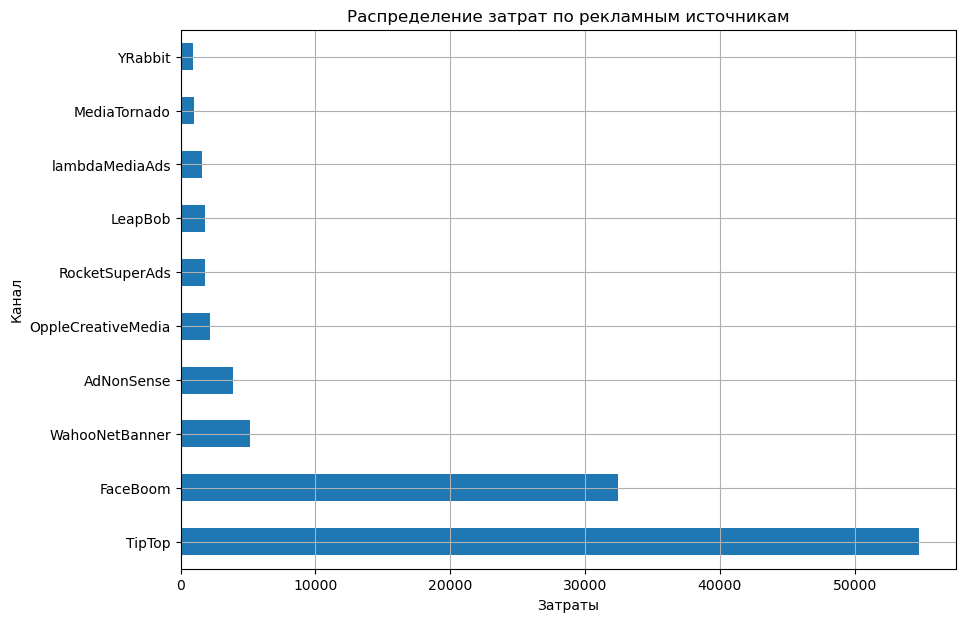

In [87]:
(
    costs_info
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
    .plot(x = 'costs', y = 'channel', kind='barh', figsize=(10,7),
    title='Распределение затрат по рекламным источникам', grid=True)
)
    
plt.xlabel('Затраты')
plt.ylabel('Канал');

**Вывод**

Более половины всех расходов на маркетинг пришлось на рекламный источник *TipTop* - "лидер" по затратам, на втором месте *FaceBoom*, на который приходится примерно треть от всех расходов.

На остальные рекламные источники затрачено значительно меньше, самое небольшое вложение наблюдается в *YRabbit*.

#### Визуализация динамики изменения расходов во времени по неделям и месяцам по каждому источнику

Для построения графика по неделям и месяцам необходимо добавить в датафрейм соответствующие столбцы:

In [91]:
costs_info['month'] = pd.to_datetime(costs_info['dt']).dt.month # добавляем столбец с месяцем
costs_info['week'] = pd.to_datetime(costs_info['dt']).dt.isocalendar().week # добавляем столбец с неделей

In [92]:
costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

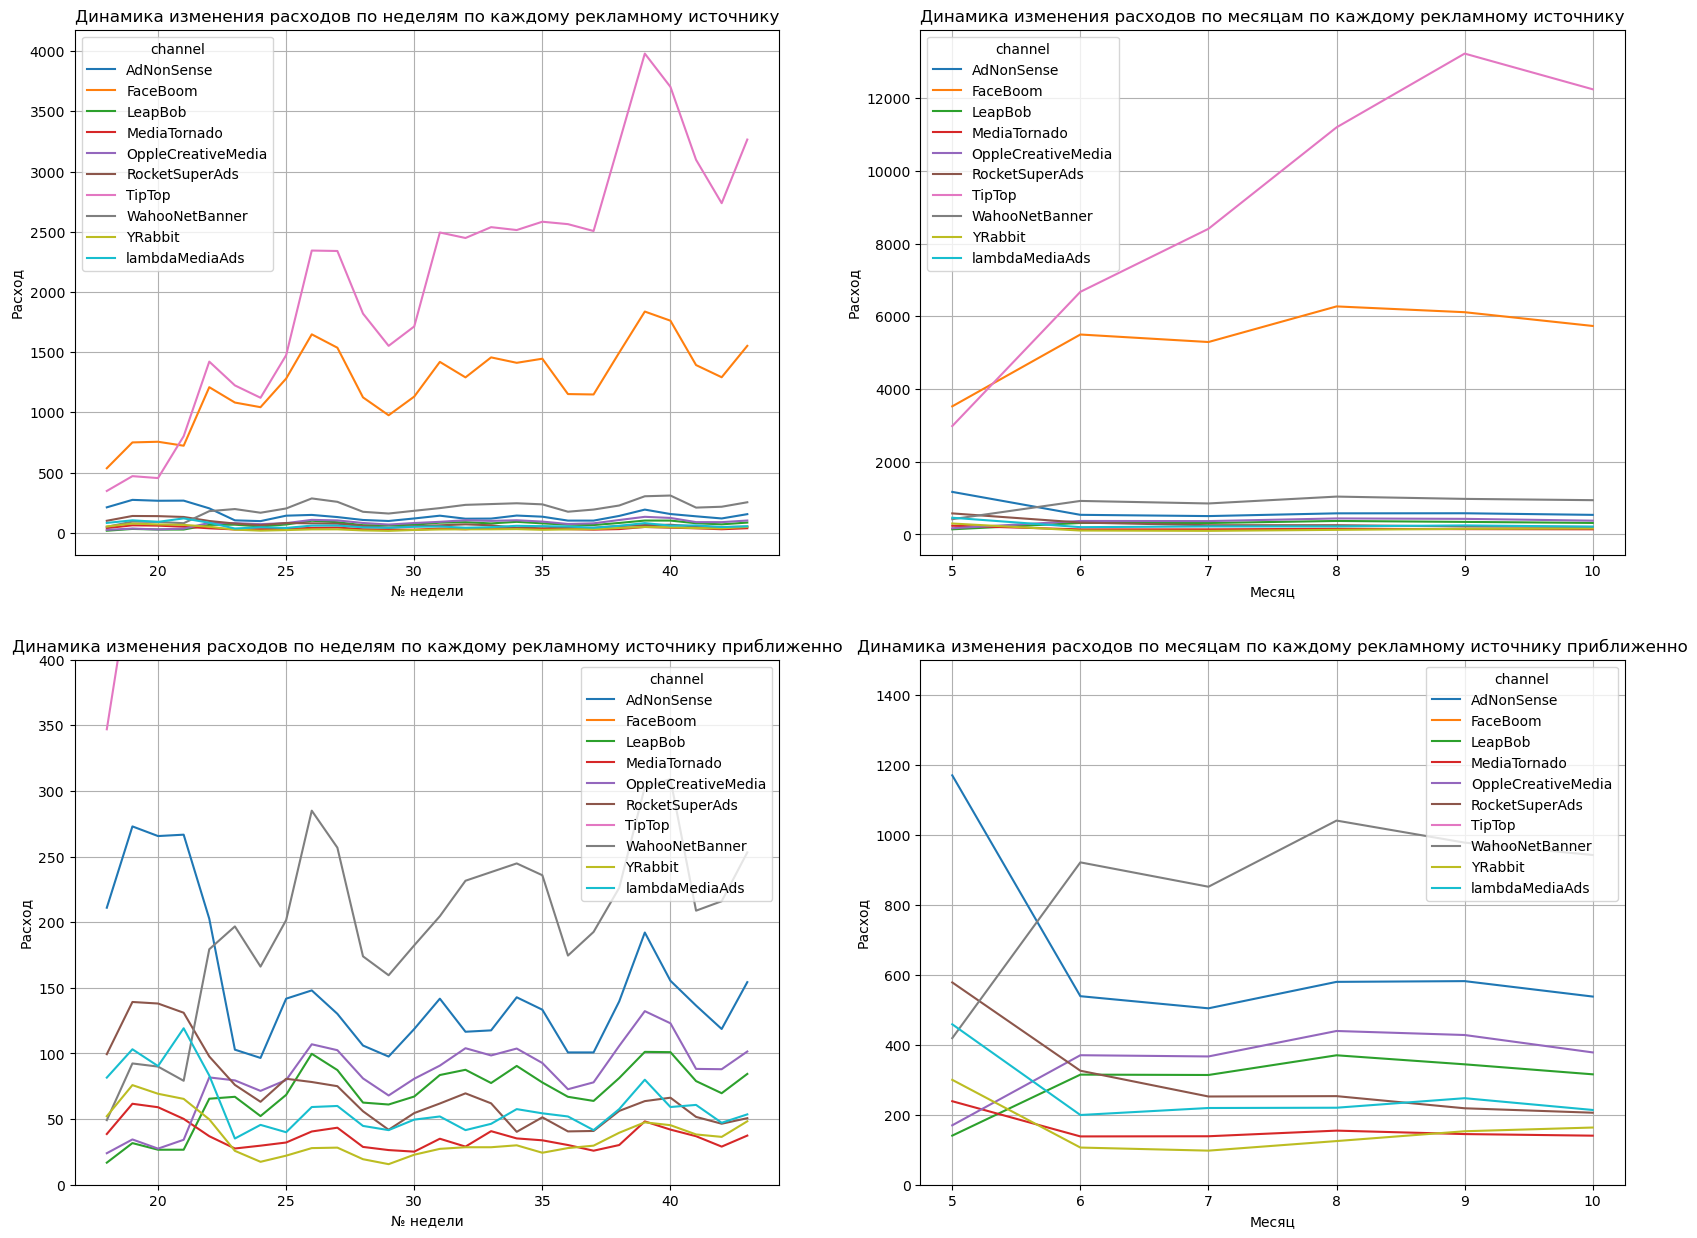

In [93]:
# динамика изменения расходов во времени по неделям и месяцам по каждому источнику

plt.figure(figsize=[20, 15])
(
    costs_info.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 1),
          title='Динамика изменения расходов по неделям по каждому рекламному источнику', grid=True)
)
plt.xlabel('№ недели')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 2),
          title='Динамика изменения расходов по месяцам по каждому рекламному источнику', grid=True)
)

plt.xlabel('Месяц')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 3),
          title='Динамика изменения расходов по неделям по каждому рекламному источнику приближенно', grid=True)
)
plt.ylim(0,400)
plt.xlabel('№ недели')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 4),
          title='Динамика изменения расходов по месяцам по каждому рекламному источнику приближенно', grid=True)
)
plt.ylim(0,1500)
plt.xlabel('Месяц')
plt.ylabel('Расход')


plt.show()

**Вывод**

По графикам видно, что маркетинговые расходы на каналы: *TipTop* и *FaceBoom* значительно превалируют над остальными каналами, как было выявлено ранее.

На недельной визуализации заметно, что расходы на *TipTop* и *FaceBoom* ступенчатые, выделяются вершины графиков на 23, 26 и 39 неделях.

На месячной визуализации кривые всех каналов, кроме *TipTop* и *FaceBoom*, более линейные и кажется, что они имеют близкое к постоянному значение. Видно, что несмотря на большое вложение в канал *FaceBoom* в сентябре (39 неделя), бОльшие месячные вложения в канал были в августе. Расходы на канал *TipTop* в среднем возрастали с мая и достигли пика в сентябре, но далее  начали снижаться.

#### Привлечение одного пользователя (CAC) из каждого источника

Сгруппируем профили пользователей по каналам привлечения и посчитаем среднее значение стоимости привлечения:

In [97]:
(
    profiles.groupby('channel')['acquisition_cost'].mean()
    .sort_values(ascending=False)
)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Визуализируем данную информацию:

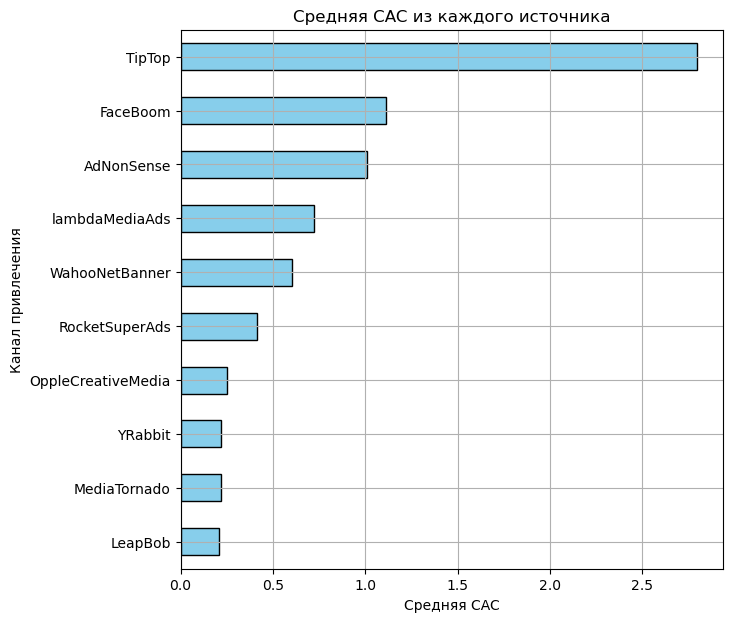

In [99]:
(
    profiles.groupby('channel')['acquisition_cost'].mean().
    drop('organic') # удаляем органический трафик, привлечение которых ничего не стоит
    .sort_values()
    .plot(kind='barh', figsize=(7,7), grid=True, edgecolor='black', color='skyblue',
          title='Cредняя CAC из каждого источника')
)

plt.xlabel('Средняя CAC')
plt.ylabel('Канал привлечения');

**Вывод**

Средняя стоимость привлечения одного клиента (CAC) достигает наивысшего значения в канале *TipTop* ~ 2,8.
Следующий канал за ним - *FaceBoom* имеет в 2,5 раза меньшую CAC.

Наименьшая средняя стоимость привлечения пользователя наблюдается в канале *LeapBob*.

### Окупаемость рекламы

#### Анализ окупаемости рекламы c помощью графиков LTV, CAC и ROI (общий)

Для построения графиков необходимо задать момент анализа - 1 ноября 2019 года и горизонт - 14 дней, а также исключанием органический трафик из профилей:

In [104]:
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

In [105]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 7  # горизонт анализа
profiles_filtered = profiles.query('channel!="organic"') # исключаем органических пользователей

In [106]:
observation_date - timedelta(days=horizon_days - 1)

datetime.date(2019, 10, 26)

Считаем показатели и строим графики:

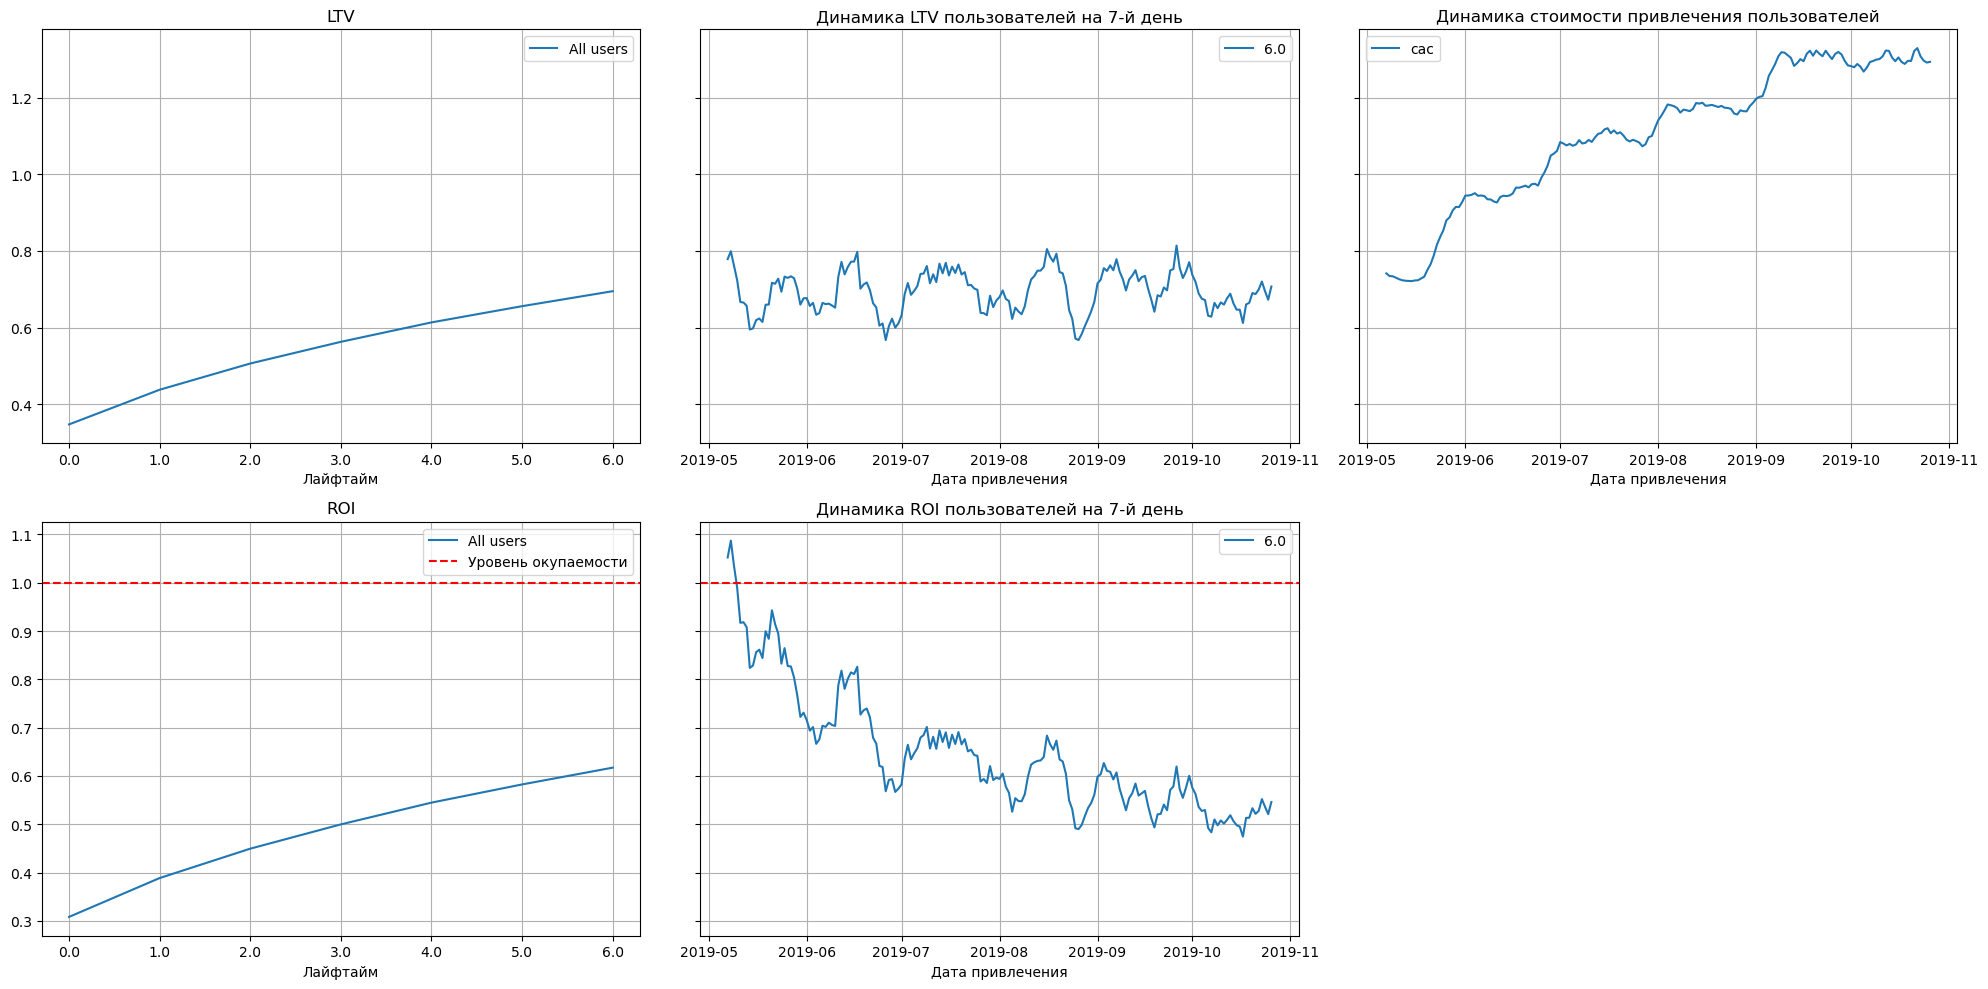

In [108]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам без дополнительной разбивки можно сделать **выводы**:

- Реклама не окупается, в конце 2-й недели ROI достигает чуть выше 60%;
- CAC значительно возрастает, что говорит об увеличении рекламного бюджета;
- LTV достаточно стабилен.

#### Конверсия и удержание пользователей

Расчет конверсии всех пользователей и построение графиков:

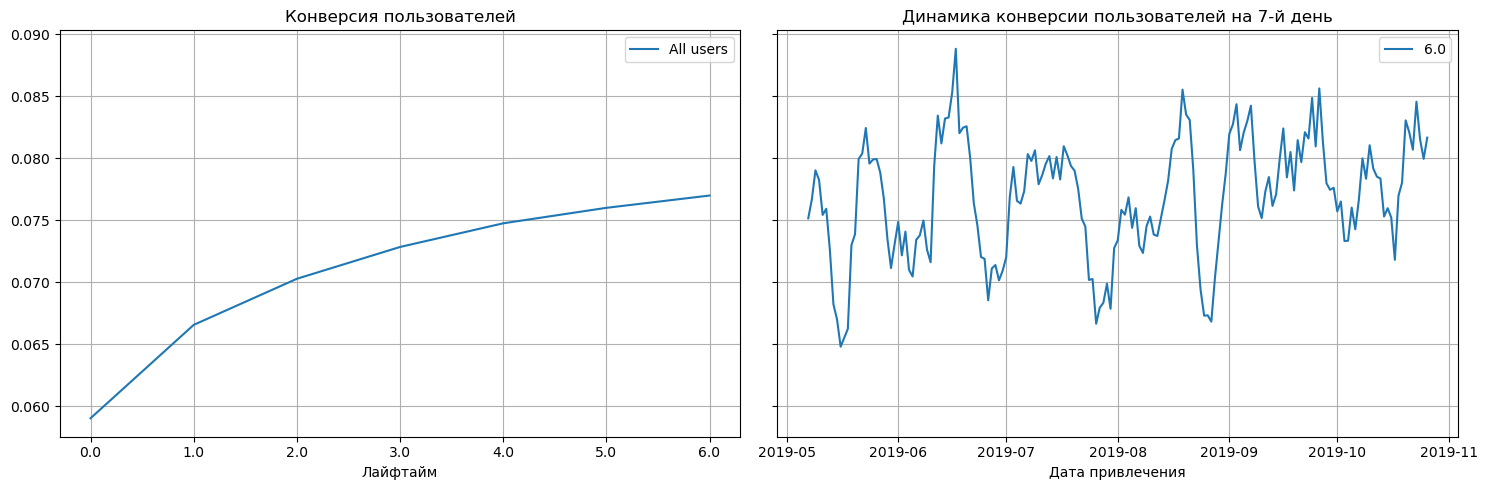

In [112]:
# смотрим конверсию без разбивки

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Общая конверсия показывает, что в целом пользователи приложения Procrastinate Pro+ на 14-й день конвертируются с показателем ~ 8%. Конверсия 14-го дня в среднем незначительно меняется во времени. Для пользователей, привлечённых в середине мае, конверсия была самой низкой за весь рассматриваемый период.

Далее рассчитаем удержание для платящих и неплатящих пользователей, построим графики:

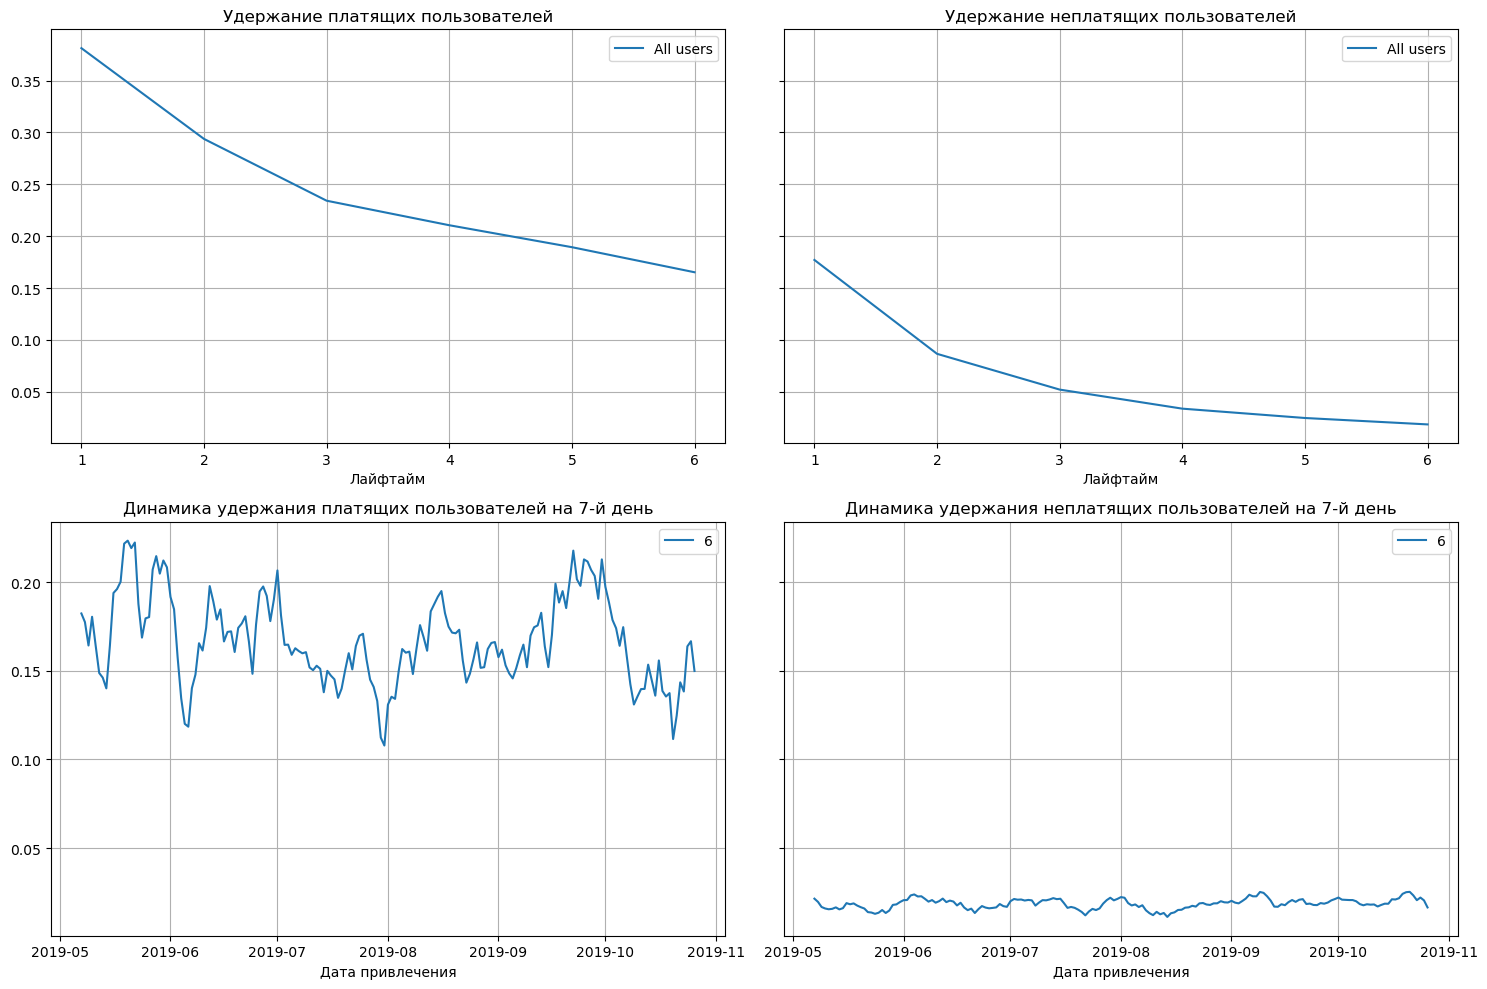

In [115]:
# смотрим удержание без доп разбивки

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются, значит, рассчёт показателя выполнен корректно. При этом динамика удержания достаточно стабильна, но в конце рассматриваемого периода у платящих пользователей она начинает снижаться.

Для более тщательного анализа необходимо рассмотреть конверсию и удержание с разбивками по:

- виду устройств;
- каналу привлечения;
- региону пользователя.

##### Конверсия и удержание пользователей с разбивкой по типу устройства:

In [118]:
# задаём дополнительную разбивку по устройствам

dimensions = ['device']

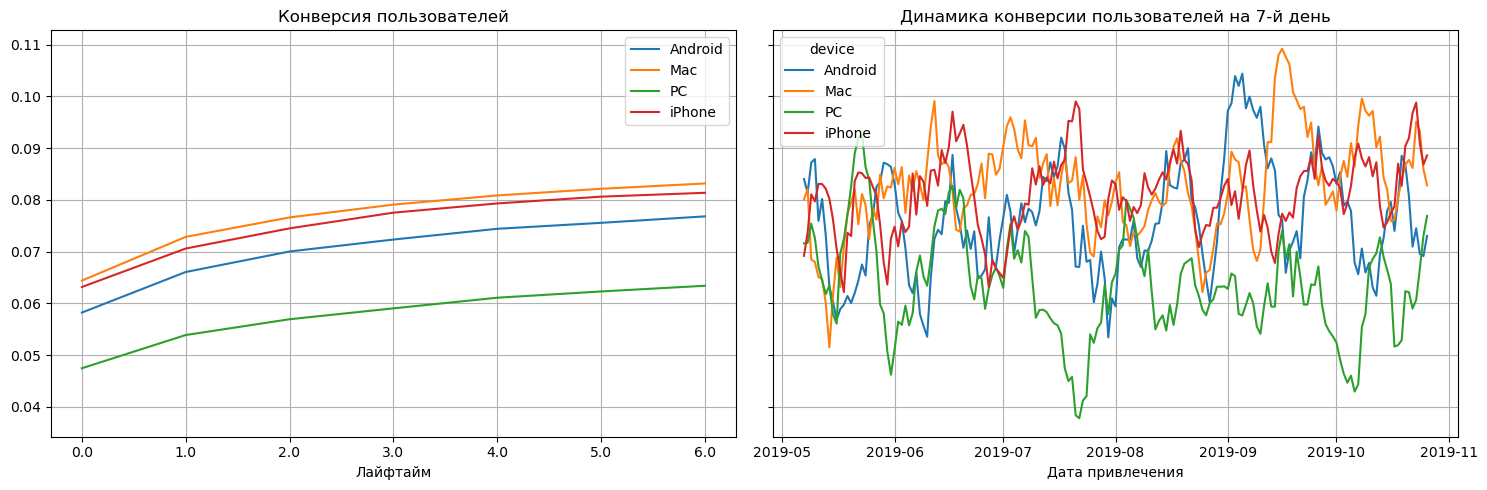

In [119]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи с *PC* конвертируются заметно хуже остальных.

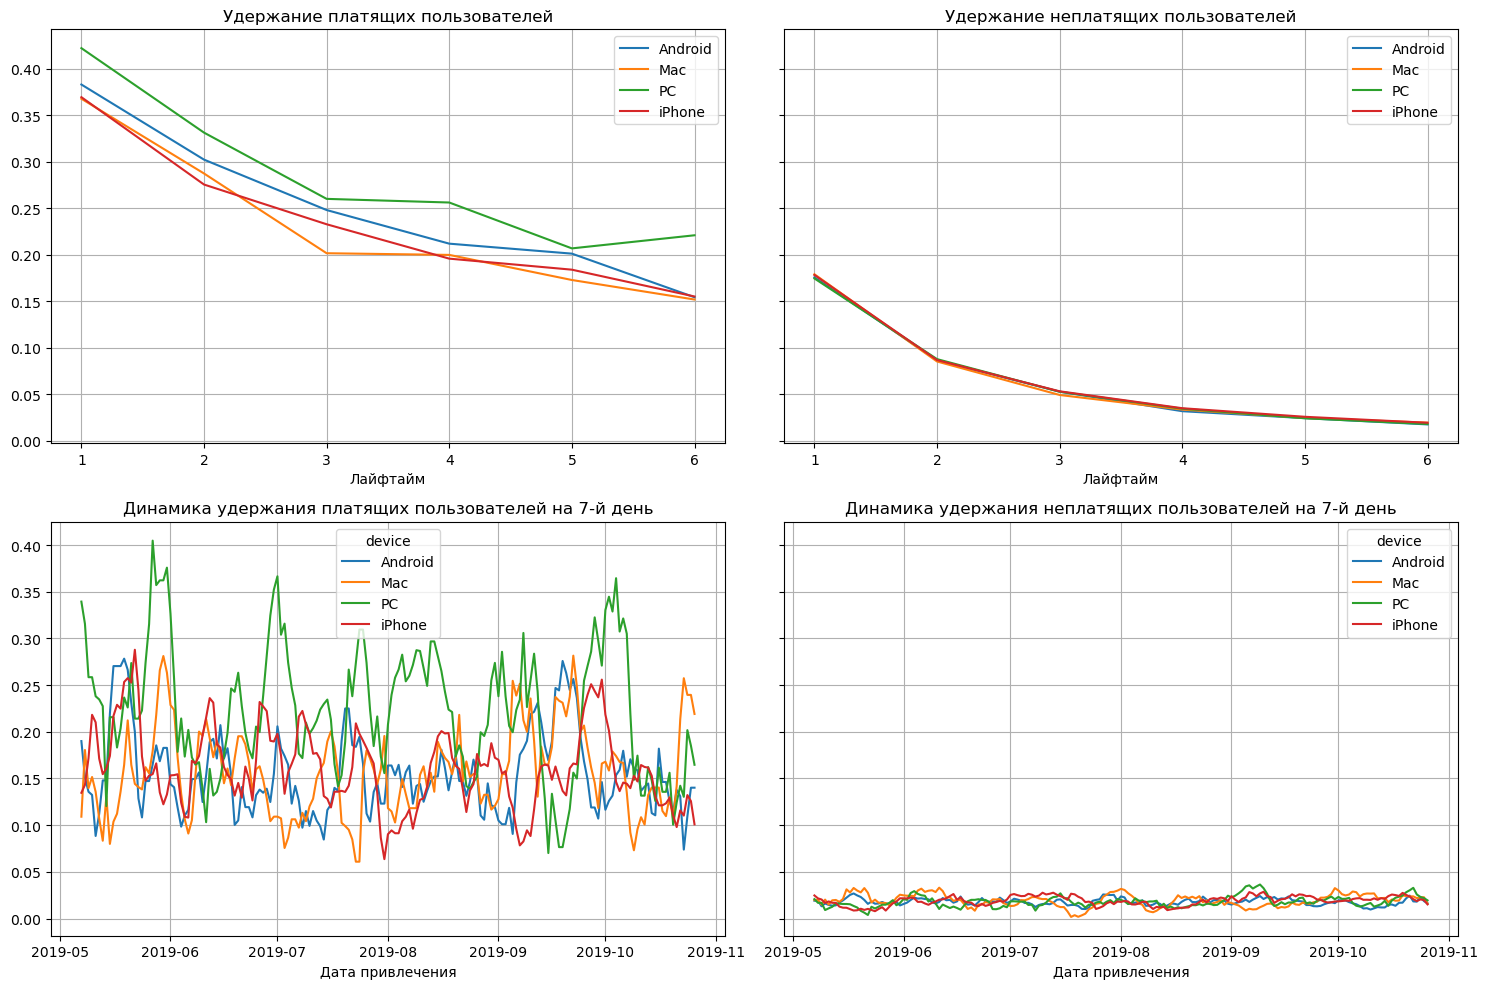

In [121]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Проблем с удержанием пользователей, использующих конкретный вид устройств, не наблюдается. Видно, что несмотря на самую низкую конверсию у пользователей с устройством *PC* удержание выше.

##### Конверсия и удержание пользователей с разбивкой по стране:

Рассмотрим конверсию и удержание пользователей из разных стран:

In [125]:
# задаём дополнительную разбивку по стране

dimensions = ['region']

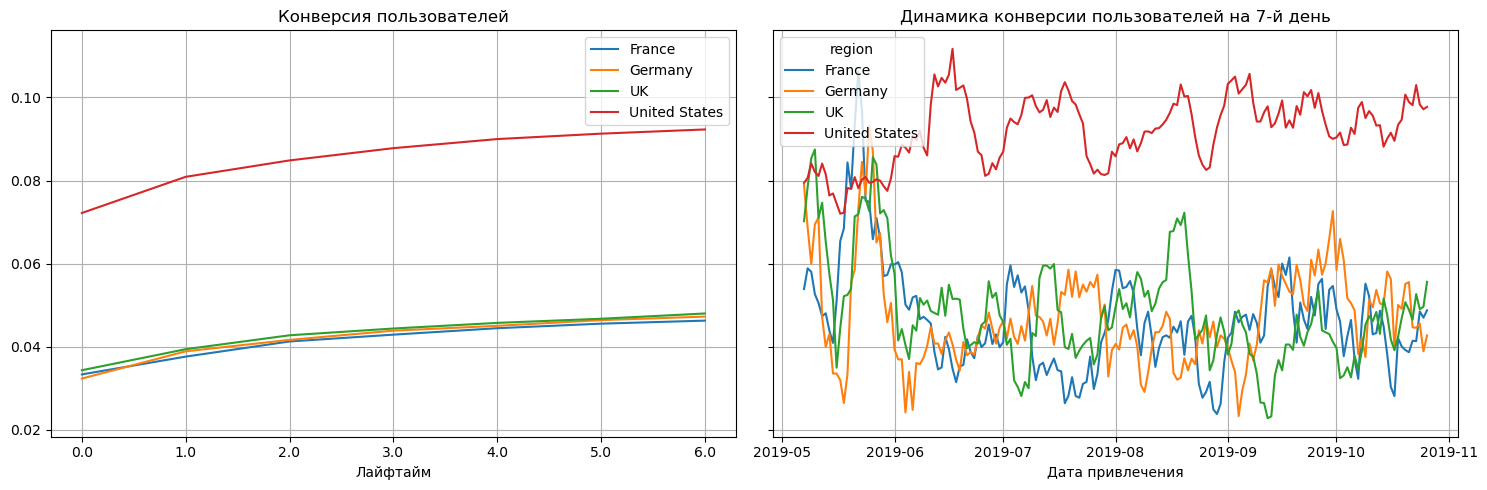

In [126]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США значительно выше, чем у пользователей из других стран, посмотрим на удержание:

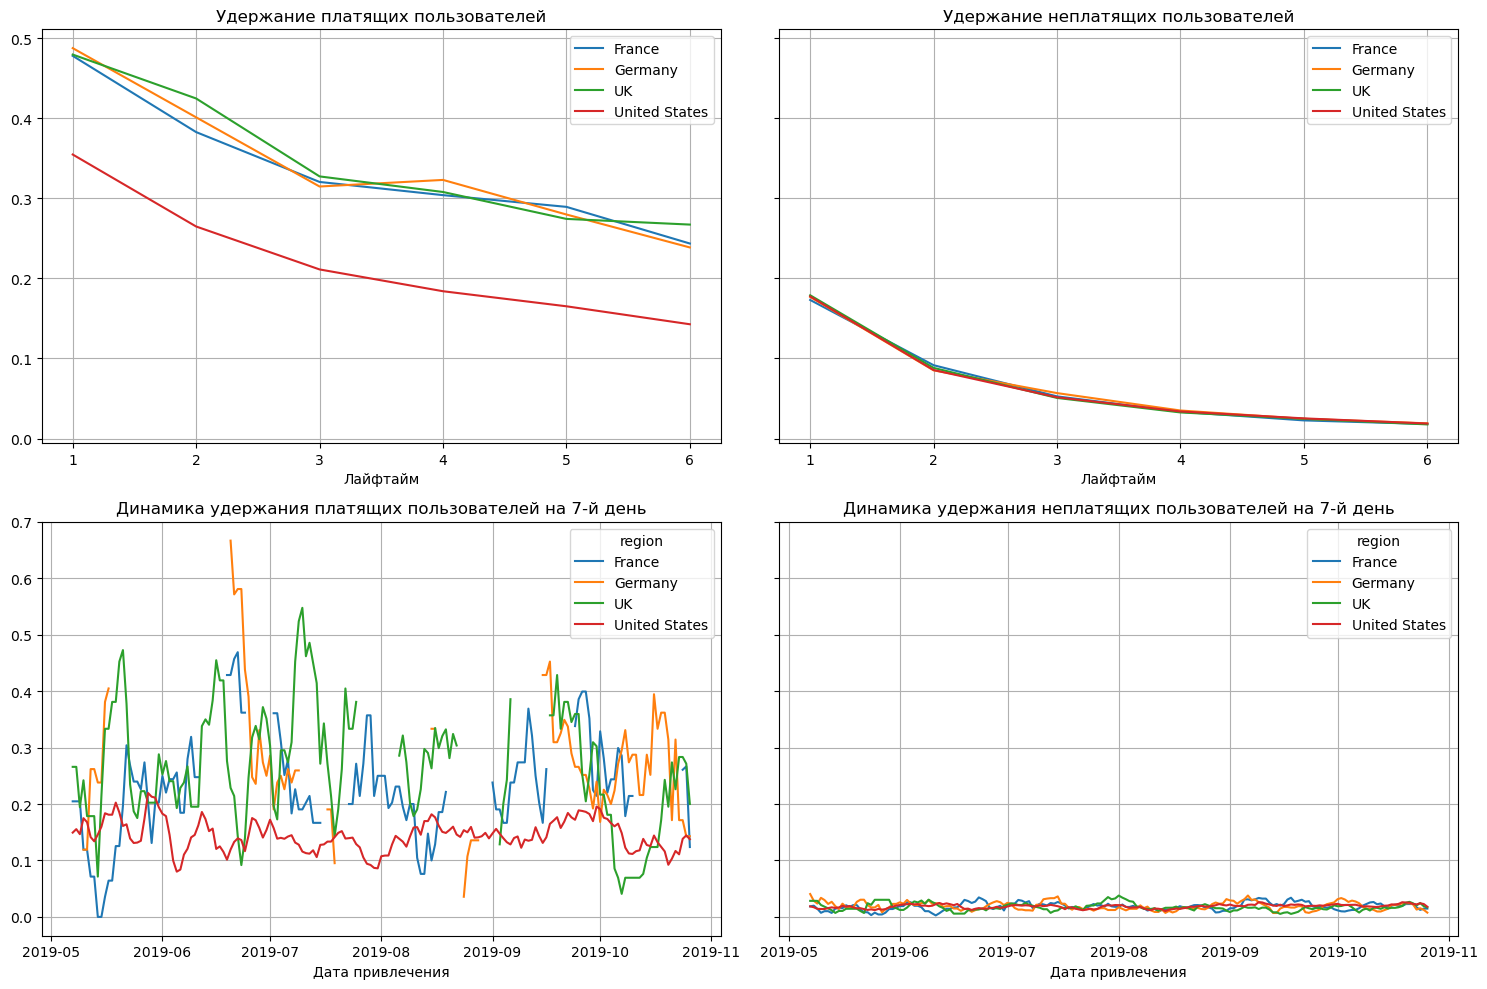

In [128]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

На удивление удержание платящих пользователей из США стабильно ниже остальных. Похоже пользователи из этой страны часто совершают первую покупку, но повторно возвращаются реже пользователей из других стран.

Видно, как прерывиста динамика удержания платящих пользователей по всем странам, кроме США - это говорит о том, что пользователи из США привлекаются на регулярной основе, их количество значительно превышает количество пользователей из других стран.

##### Конверсия и удержание пользователей с разбивкой по каналу привлечения:

Рассмотрим конверсию и удержание пользователей, привлеченных из разных источников:

In [132]:
# задаём дополнительную разбивку по каналу привлечения

dimensions = ['channel']

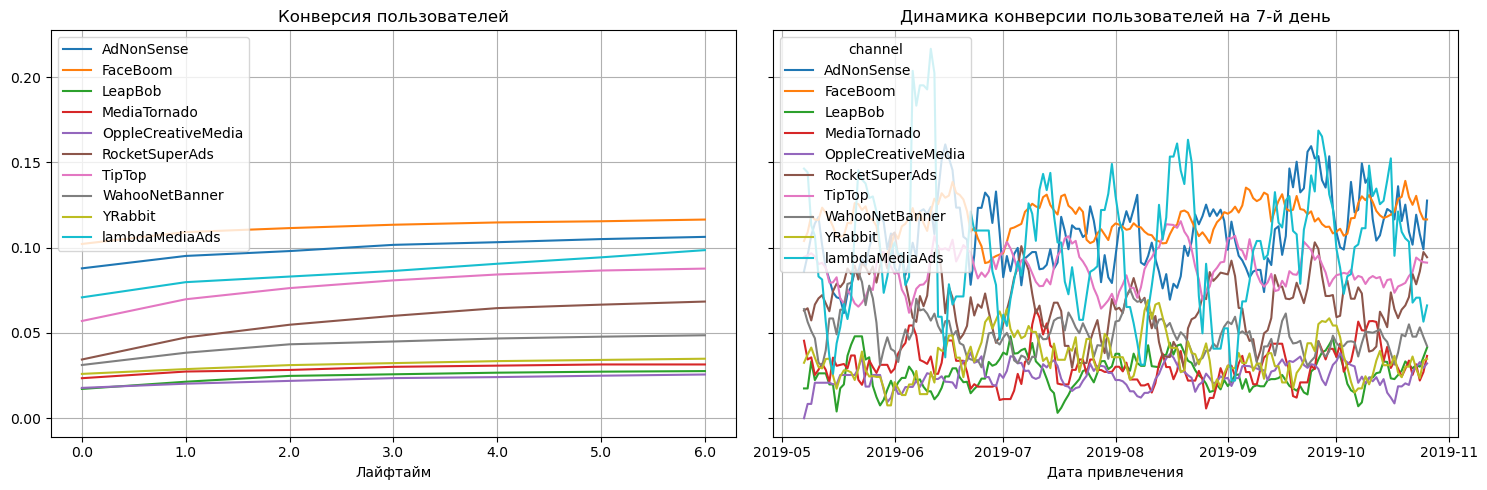

In [133]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей, привлеченных из *FaceBoom* является самой высокой, ниже всех конверсия у OppleCreativeMedia. При этом видно, что конверсия очень слабо растёт после второго лайфтайма.

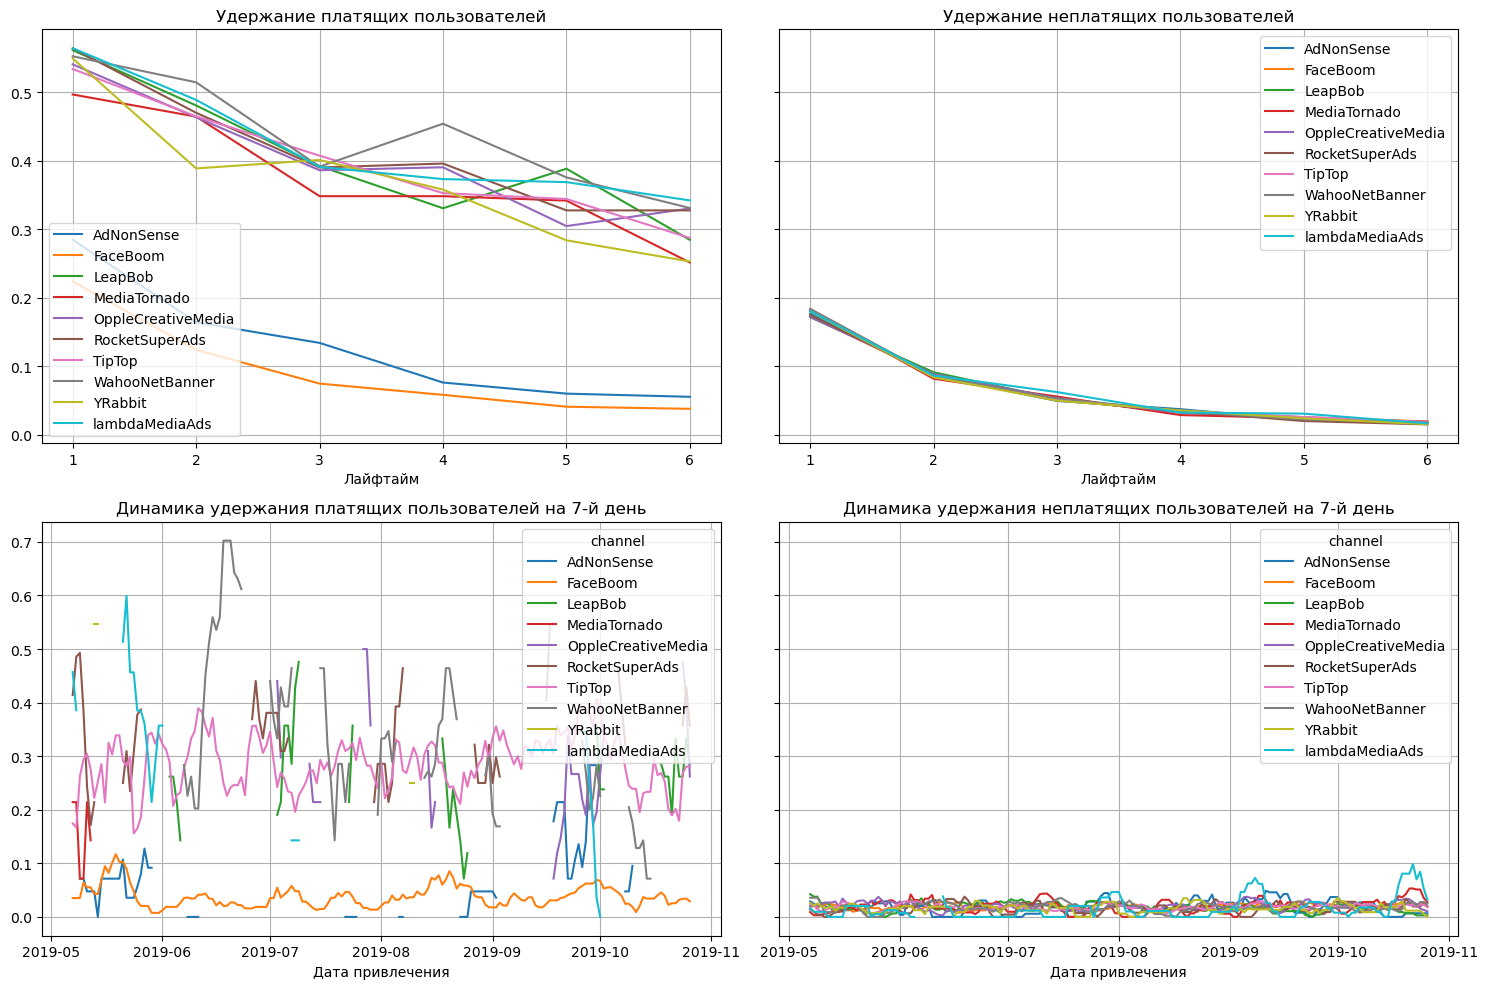

In [135]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

В удержании пользователей мы снова видим проблему. Несмотря на высокую конверсию, платящие пользователи каналов *FaceBoom* и *AdNonSense* стабильно плохо удерживаются. Возможно на этих каналах предлагается какой-то дополнительный бонус от канала привлечения за первую покупку, ради которой пользователи совершают её и больше не возращаются.

Также может быть проблема технического характера, возможно возникают ошибки в платежах при попытке совершить их через данные рекламные каналы. Для более полной информации необходимы данные о событиях.

Динамика удержания по некоторым каналам довольно прерывиста, это говорит о том, что по ним приходит мало новых пользователей, не каждый день/неделю/месяц.

#### Анализ окупаемости рекламы с разбивкой по устройствам

In [138]:
# задаём дополнительную разбивку по устройствам

dimensions = ['device']

Считаем показатели LTV, CAC, ROI и строим графики:

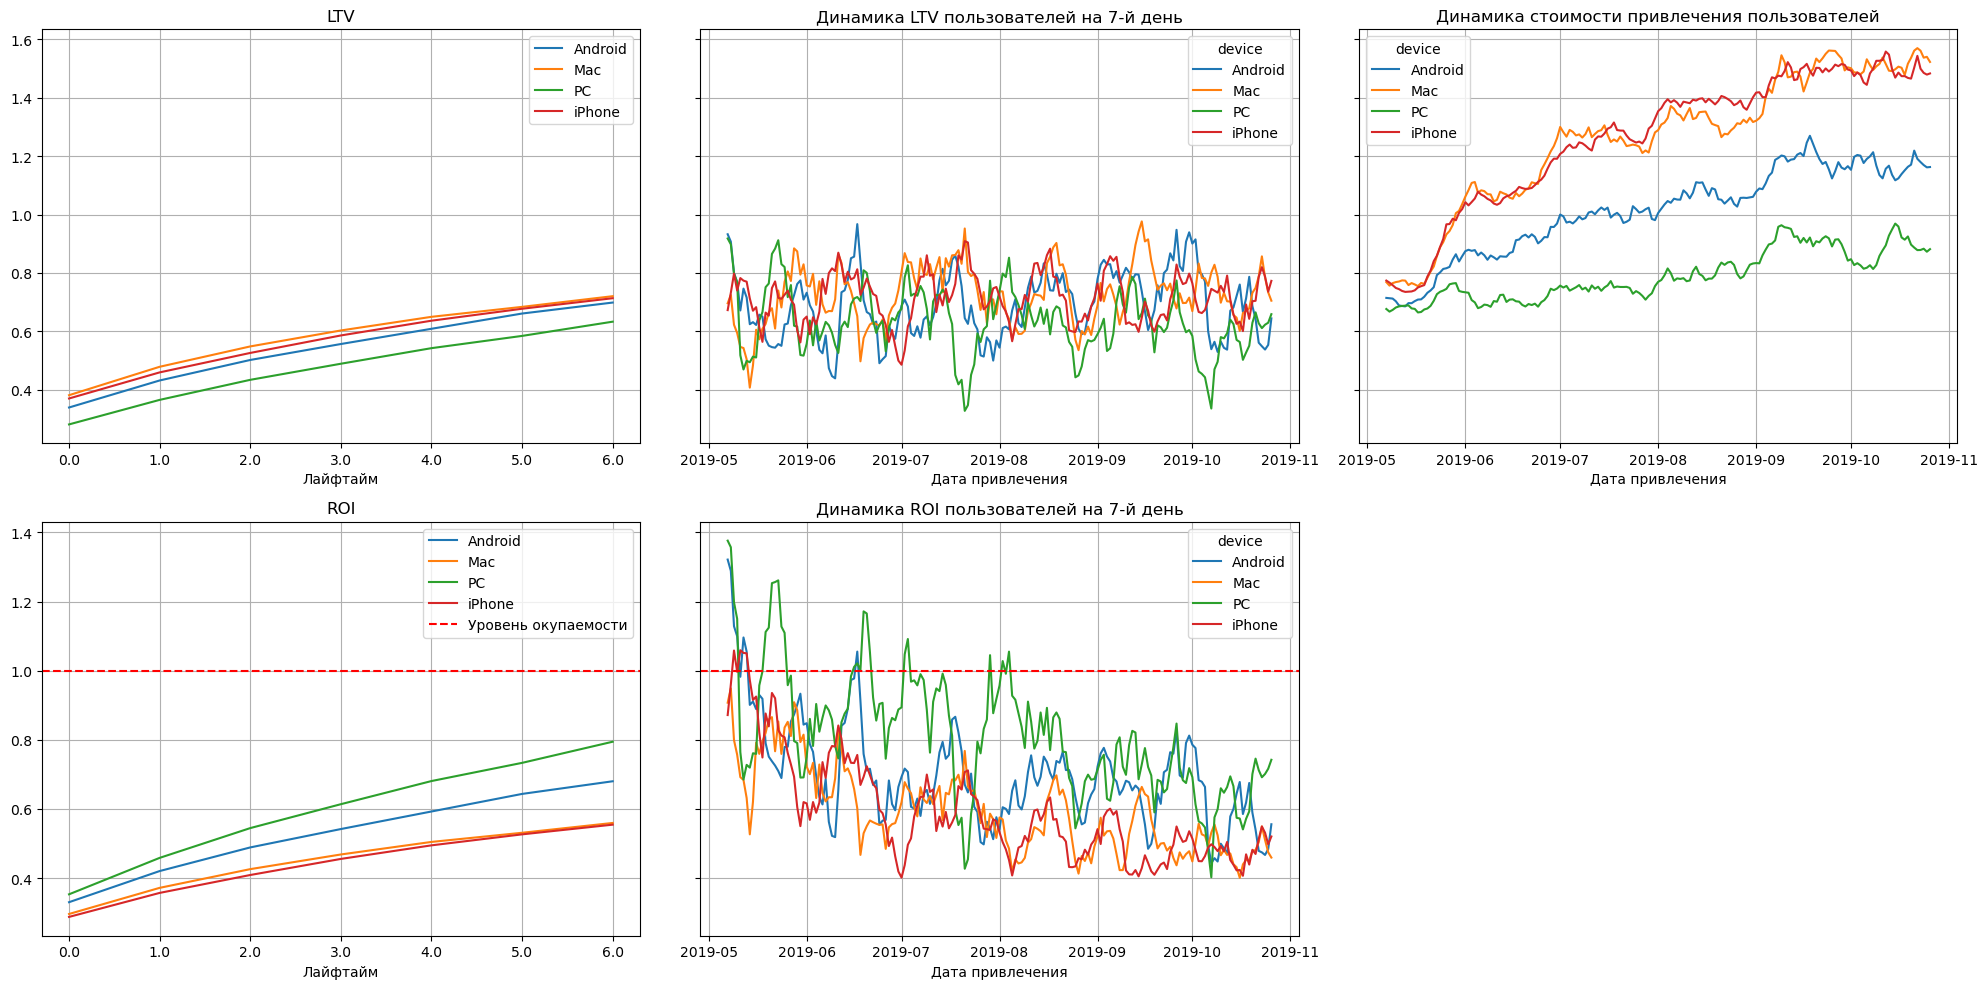

In [140]:
# считаем LTV и ROI с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV клиентов стабилен. Те клиенты, кто пользуется *iPhone* и *Mac*, являются самыми дорогими по стоимости привлечения. При этом клиенты, пользующиеся всеми видами устройств, не окупаются по прошествии 14-и дней после привлечения.

Это говорит о том, что с увеличением расходов на рекламу снижается окупаемость клиентов, то есть привлечения платящих пользователей недостаточно. При этом, скорее всего, каналы, на которые были потрачены бОльшие суммы маркетингового бюджета, привлекали больше пользователей, использующих *iPhone* и *Mac*, вероятно это связано со странами привлечения пользователей каналами.

#### Анализ окупаемости рекламы с разбивкой по странам

In [143]:
# задаём дополнительную разбивку по устройствам

dimensions = ['region']

Считаем показатели LTV, CAC, ROI и строим графики:

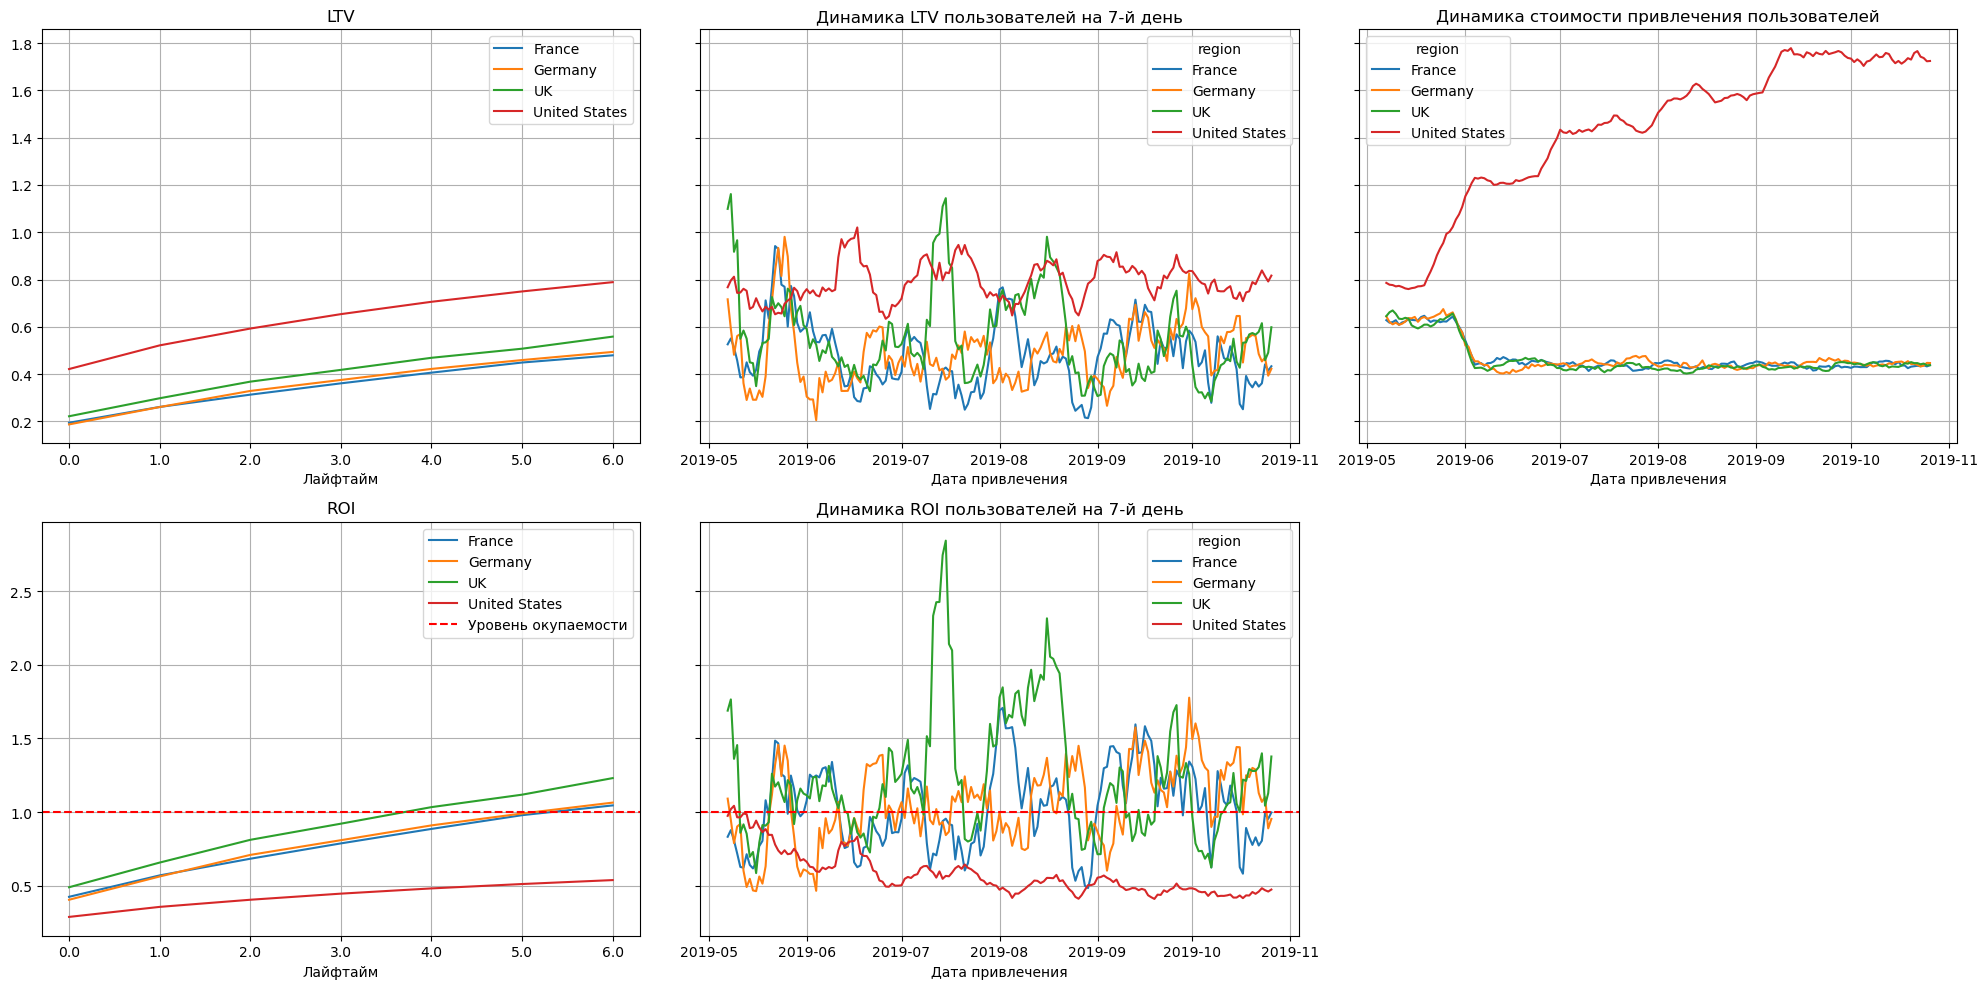

In [145]:
# считаем LTV и ROI с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видим, что пользователи США стабильно не окупаются, среди всех остальных стран. При этом стоимость привлечения клиентов оттуда очень выросла. Значит, увеличенный рекламный бюджет был направлен на те каналы привлечения, с которых приходили именно пользователи из США. Проверим:

In [147]:
# количество привлеченных пользователей разных стран по каналу TipTop

profiles_filtered.query('channel=="TipTop"').groupby('region')['user_id'].nunique()

region
France               0
Germany              0
UK                   0
United States    19561
Name: user_id, dtype: int64

In [148]:
# количество привлеченных пользователей разных стран по каналу FaceBoom

profiles_filtered.query('channel=="FaceBoom"').groupby('region')['user_id'].nunique()

region
France               0
Germany              0
UK                   0
United States    29144
Name: user_id, dtype: int64

Гипотеза подтвердилась. Маркетологи потратили значительный рекламный бюджет на каналы привлечения пользователей из США.

#### Анализ окупаемости рекламы с разбивкой по каналам привлечения

In [151]:
# задаём дополнительную разбивку по каналам привлечения

dimensions = ['channel']

Считаем показатели LTV, CAC, ROI и строим графики:

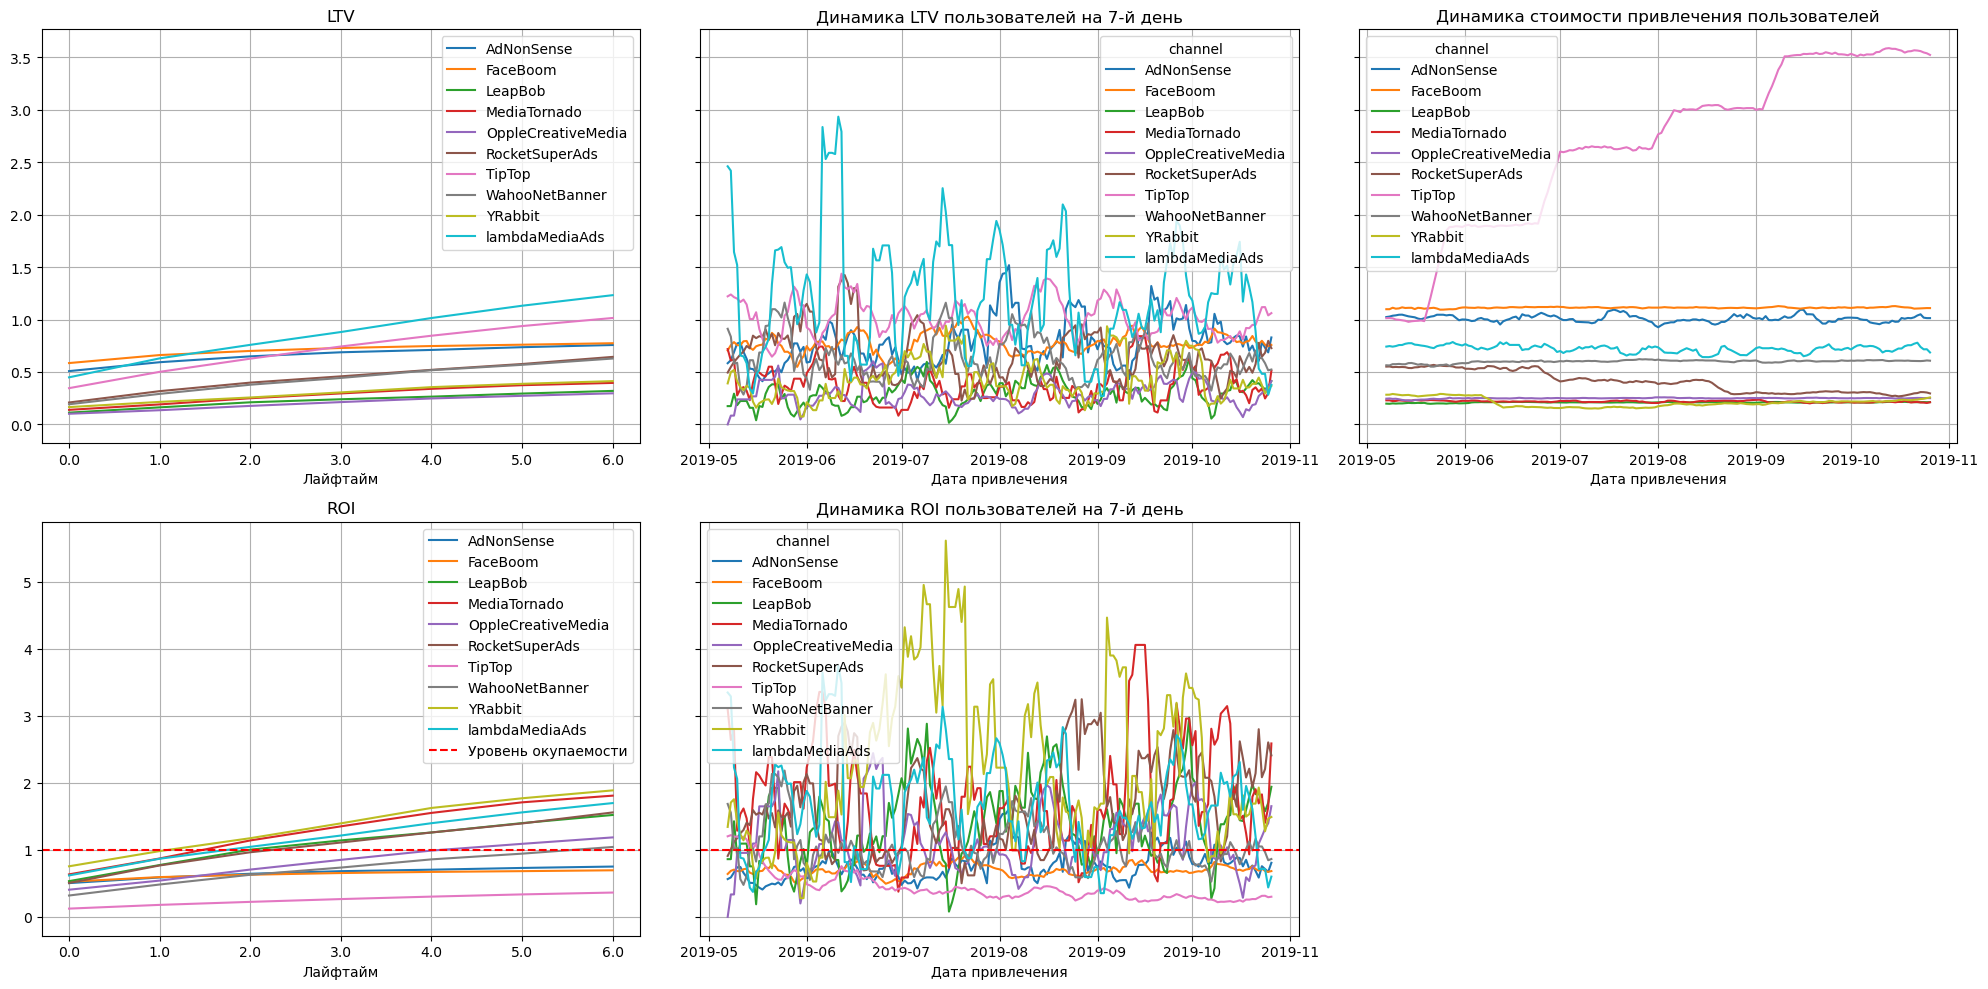

In [153]:
# считаем LTV и ROI с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Пользователи, привлеченные с каналов *AdNonSense*, *TipTop* и *FaceBoom* не окупаются. При этом, если на канал *AdNonSense* рекламные расходы особо не менялись, а даже снизились, то на каналы *FaceBoom* и *TipTop* было привлечено значительное количество рекламных средств, то есть отдел маркетинга рассчитывал, что увеличение рекламного бюджета на данные источники будет оптимальным с точки зрения привлечения новых клиентов и увеличения прибыли, однако этого не произошло.
- Заметим, что стоимость привлечения пользователей через канал *FaceBoom* при этом не изменилась, значит, увеличение бюджета на данный канал привело к увеличению привлечения платящих пользователей, однако этот канал и раньше себя не окупал - сильно дорогой трафик.
- Стоимость привлечения пользователей через канал *TipTop* в динамике растёт, значит увеличение рекламного бюджета на канал не даёт линейного увеличения привлечения платящих пользователей. Маркетологи выбрали самые дорогостоящие по трафику каналы и они не оправдали себя.

Ниже построю графики изменения количества привлеченных клиентов, как всех, так и только платящих за рассматриваемый период:

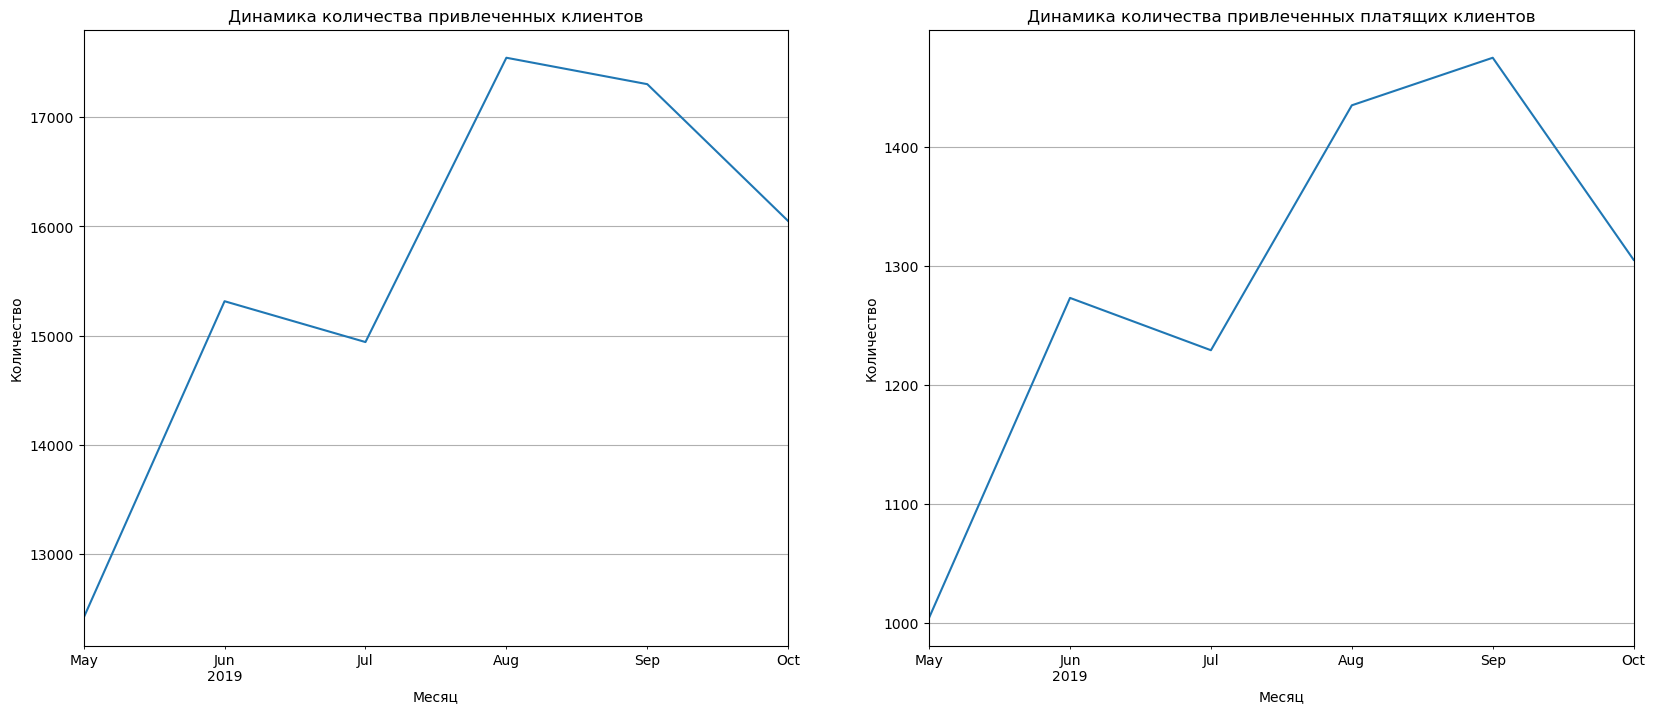

In [157]:
# количество привлеченных клиентов

plt.figure(figsize=[20, 8])
(
    profiles_filtered.groupby('month')['user_id']
    .nunique()
    .plot(title='Динамика количества привлеченных клиентов', 
          ax=plt.subplot(1, 2, 1), grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество')

(
    profiles_filtered.query('payer==True').groupby('month')['user_id']
    .nunique()
    .plot(title='Динамика количества привлеченных платящих клиентов', 
          ax=plt.subplot(1, 2, 2),grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество')


plt.show()

Получается, что после увеличения бюджета рекламных средств общее привлечение пользователей и привлечение платящих пользователей увеличилось, однако этого было недостаточно для того, чтобы окупился рекламный бюджет.

In [159]:
# количество привлеченных платящих клиентов по каналам привлечения и регионам

profiles_filtered.query('payer==True').pivot_table(index=['channel', 'region'], values='user_id', aggfunc='nunique')

user_id
channel            region                
AdNonSense         France             150
                   Germany            142
                   UK                 148
                   United States        0
FaceBoom           France               0
                   Germany              0
                   UK                   0
                   United States     3557
LeapBob            France              90
                   Germany             69
                   UK                 103
                   United States        0
MediaTornado       France               0
                   Germany              0
                   UK                   0
                   United States      156
OppleCreativeMedia France              80
                   Germany             64
                   UK                  89
                   United States        0
RocketSuperAds     France               0
                   Germany              0
                   UK                   0
                   United States      352
TipTop             France               0
                   Germany              0
                   UK                   0
                   United States     1878
WahooNetBanner     France             152
                   Germany            148
                   UK                 153
                   United States        0
YRabbit            France               0
                   Germany              0
                   UK                   0
                   United States      165
lambdaMediaAds     France              82
                   Germany             67
                   UK                  76
                   United States        0

## Общий вывод

В ходе проведенного исследования для развлекательного приложения *Procrastinate Pro+* проанализированы данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, их покупках и расходах компании на рекламу в этот период.
Исследование проводилось в несколько этапов:

- выполнена предобработка данных: установлен корректный тип данных и стиль оформления, проведена проверка на пропуски и дубликаты;
- для подготовки к исследованию были заданы функции для расчёта LTV, CAC, ROI, удержания и конверсии, также заданы функции для построения графиков по данным метрикам;
- проведен исследовательский анализ данных: построены профили пользователей, представлено общее количество пользователей и доля платящих клиентов по нескольким разбивкам (страны, устройства, рекламные каналы);
- проанализированы маркетинг компании, распределение маркетинговых расходов;
- оценена окупаемость рекламы приложения.

**После проведенного исследования можно сделать следующие выводы:**

1. Общая сумма расходов на маркетинг за рассматриваемый период составила около 105 тысяч. Всего компания использует 11 каналов привлечения клиентов. Более половины всех расходов пришлось на канал *TipTop* - "лидер" по затратам, на втором месте *FaceBoom*, на который приходится примерно треть от всех расходов.


2. Выявлено, пользователи не окупаются через две недели после привлечени, ROI — около 60%, CAC значительно возрастает, что говорит об увеличении рекламного бюджета с июня 2019, а LTV достаточно стабилен.


3. С помощью анализа метрик в различных разбивках выявлены причины неэффективности привлечения пользователей:


- *конверсия пользователей из США значительно выше, чем у пользователей из других стран, однако удержание платящих пользователей из данной страны стабильно ниже остальных, то есть платящие пользователи из США повторно возвращаются реже других. Вероятнее всего, отдел маркетинга решил, что раз доля платящих пользователей выше в США, и пользователей оттуда приходит в приложение больше, то необходимо направить рекламу на привлечение именно таковых клиентов. Однако они не учли показатель их удержания. Возможно у пользователей каналов FaceBoom и AdNonSense (с низким удержанием) возникает проблема технического характера, например, ошибки платежа. Это больше влияет на повышение стоимости привлечения и неоккупаемость американских клиентов, так как именно на них был распределен основной рекламный бюджет. Для более полной информации необходимы данные о событиях.*


**Итого: отдел маркетинга решил вложиться в те каналы привлечения, которые привлекают больше всего пользователей из США (что логично, ведь у данных пользователей высокий показатель конверсии и доля платящих): *TipTop* и *FaceBoom*. Однако данные каналы имеют самый дорогой трафик, который не окупается. Масштабирование канала *TipTop*, который становится всё хуже и хуже - сомнительная идея. Стоит оптимизировать расход на маркетинг и следить за метриками в дальнейшем.**


**Рекомендации отделу маркетинга:** 

1. Необходимо проработать проблему низкого удержания у пользователей США, также отказаться от привлечения в дорогостоящих и не окупаемых каналах - *TipTop*. Помимо этого, можно вложиться в канал *RocketSuperAds* - следующий по количеству привлеченных платящих пользователей окупаемый канал, с неплохой конверсией и удержанием, но важно следить за динамикой.


2. Также стоит обратить внимание на привлечение пользователей из других стран, которые стабильно окупаются, увеличение их трафика также поможет росту прибыли компании. В таком случае рекомендуется обратить внимание на канал *lambdaMediaAds* с хорошей конверсией, удержанием, LTV и окупаемостью.